In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras

In [2]:
# fetch dataset
mammographic_mass = pd.read_csv('/content/drive/MyDrive/Διαχείριση Δεδομένων ΙΙ (ΕΦΠ07)/Machine_Learning/mammographic+mass/mammographic_masses.data.txt',na_values = ['?'], names = ['BI_RADS','age','shape','margin','density','severity'])

In [3]:
# dataset head
mammographic_mass.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
# dataset info
mammographic_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI_RADS   959 non-null    float64
 1   age       956 non-null    float64
 2   shape     930 non-null    float64
 3   margin    913 non-null    float64
 4   density   885 non-null    float64
 5   severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [5]:
# dataset describe
mammographic_mass.describe()

,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


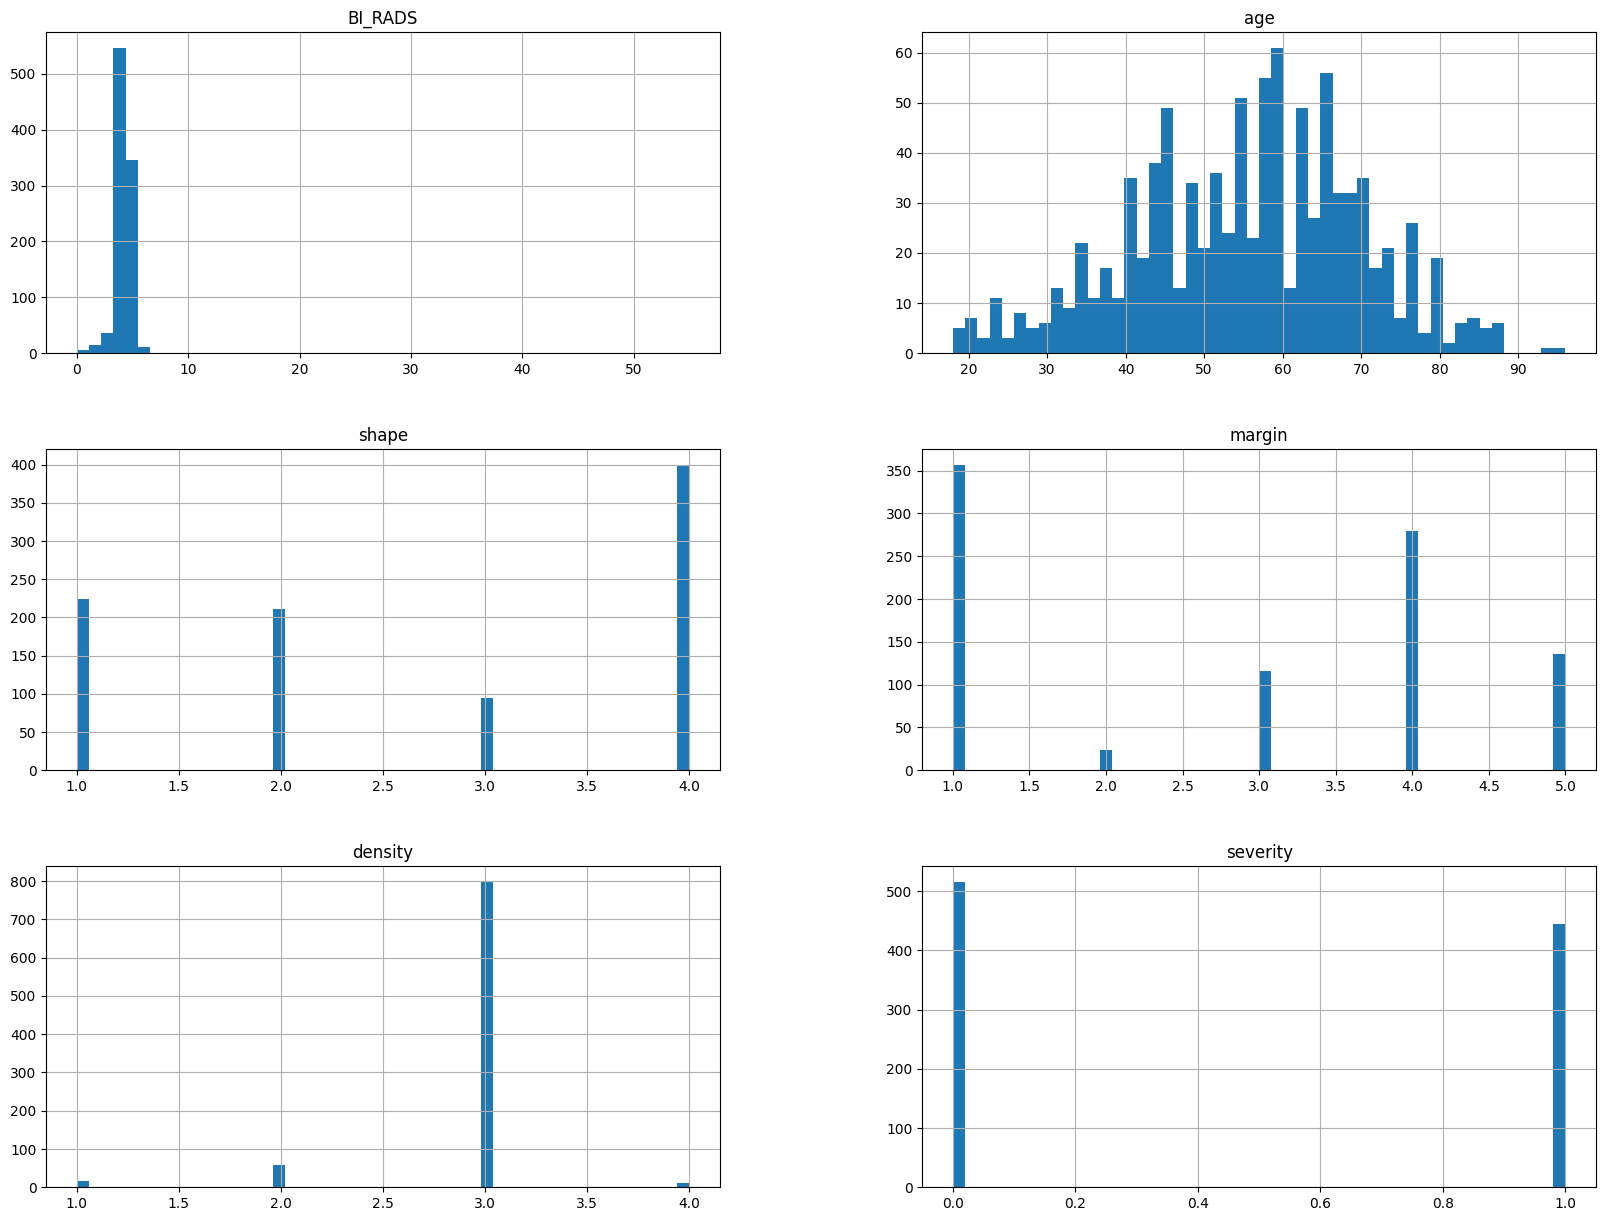

In [6]:
# dataset plots
mammographic_mass.hist(bins=50,figsize=(20,15))
plt.show()

In [7]:
# dataset null values
mammographic_mass.isnull().sum()

BI_RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

<Axes: >

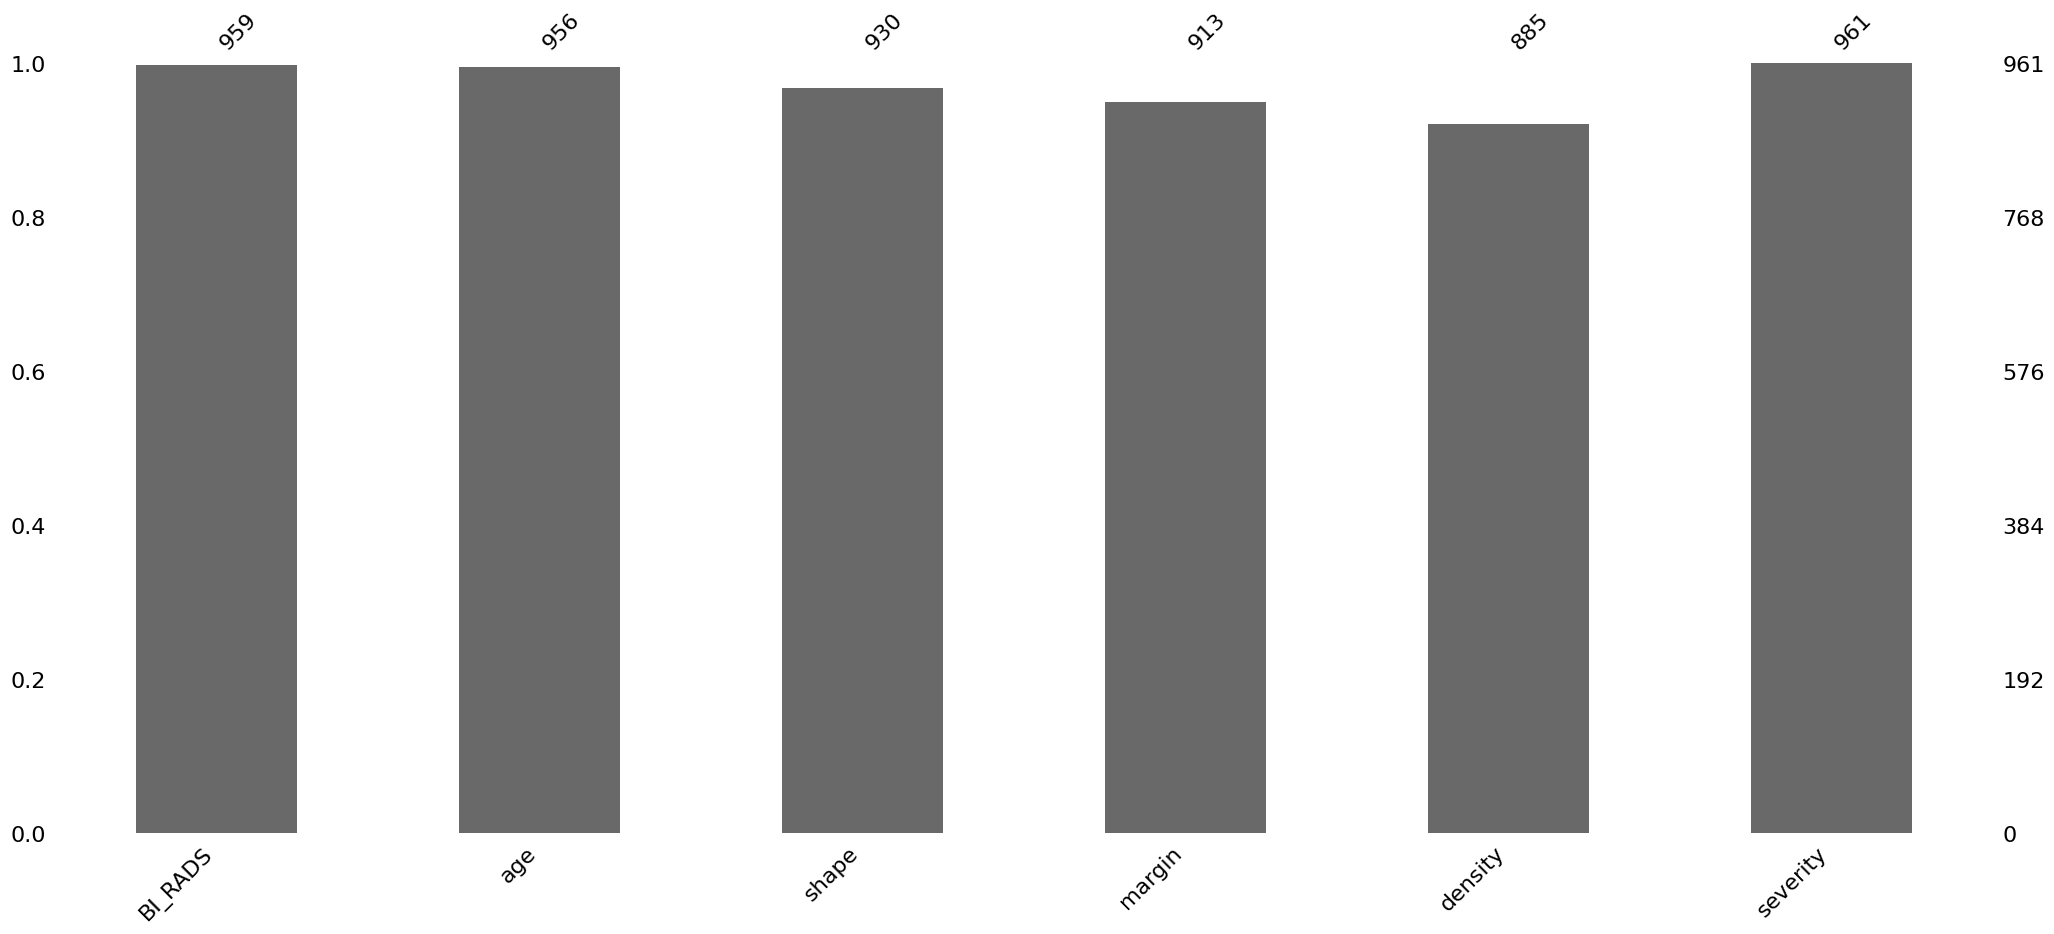

In [8]:
msno.bar(mammographic_mass)

<Axes: >

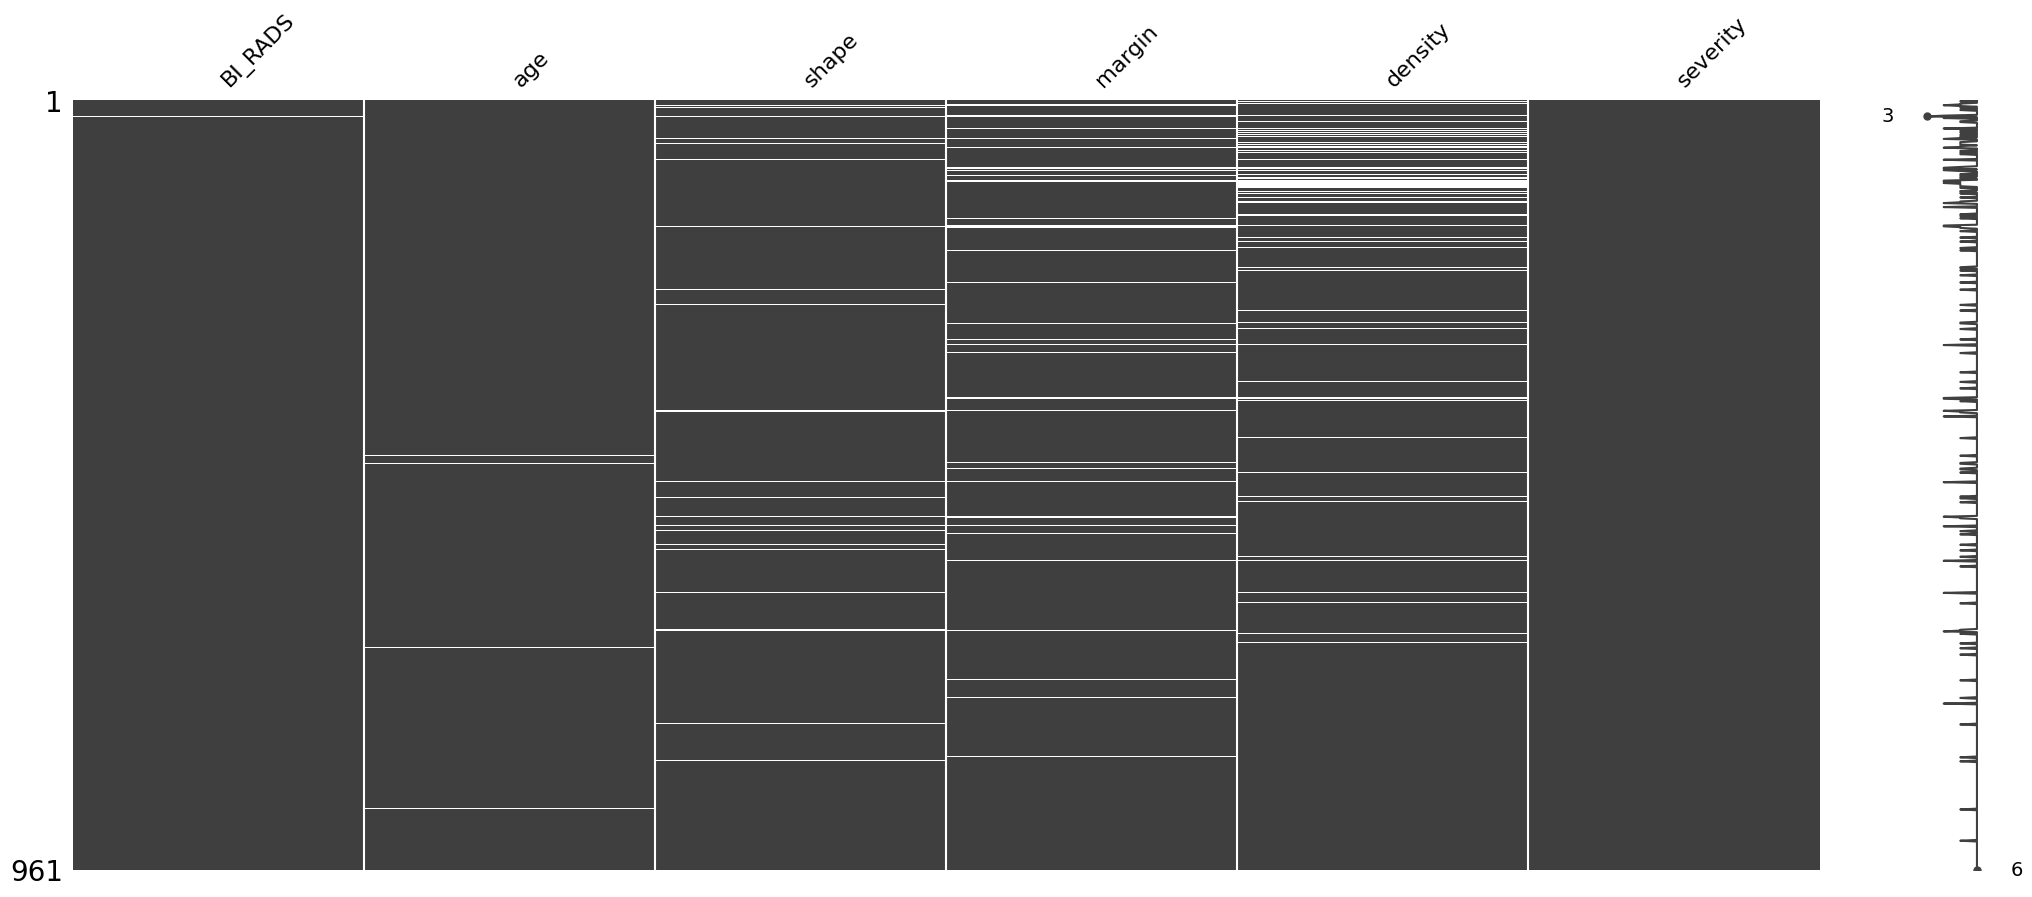

In [9]:
msno.matrix(mammographic_mass)

In [10]:
# Replace null values
mammographic_mass['BI_RADS']=mammographic_mass['BI_RADS'].replace(np.nan,mammographic_mass['BI_RADS'].median())
mammographic_mass['age']=mammographic_mass['age'].replace(np.nan,mammographic_mass['age'].median())
mammographic_mass['shape']=mammographic_mass['shape'].replace(np.nan,mammographic_mass['shape'].median())
mammographic_mass['margin']=mammographic_mass['margin'].replace(np.nan,mammographic_mass['margin'].median())
mammographic_mass['density']=mammographic_mass['density'].replace(np.nan,mammographic_mass['density'].median())


In [11]:
# Check for replacement
mammographic_mass.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,3.0,1


In [12]:
# Data correlation
C = mammographic_mass.corr()

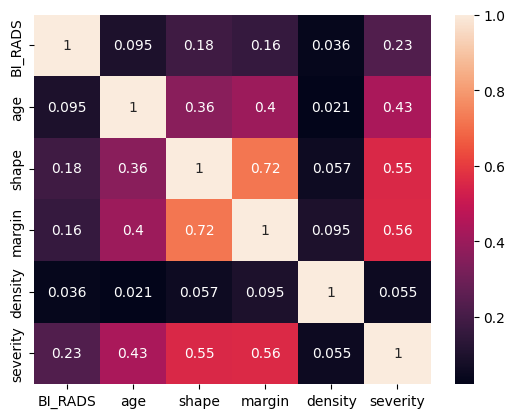

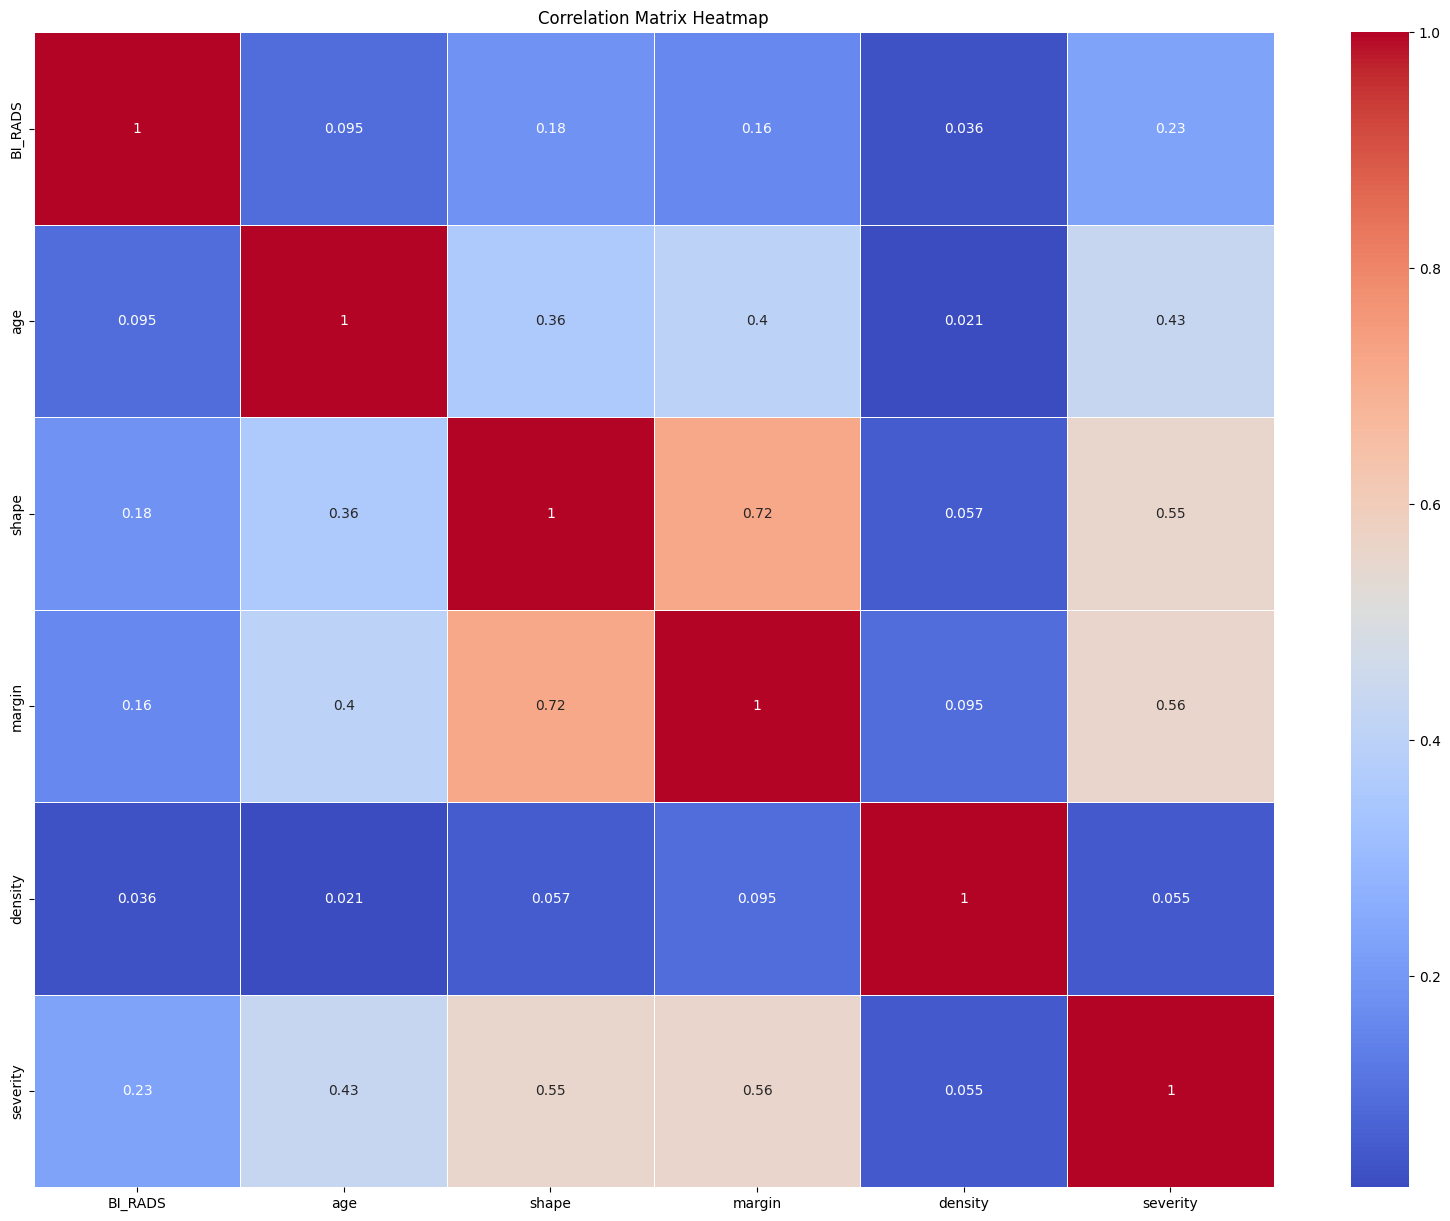

In [13]:
# Heatmap
sns.heatmap(C, annot=True)
plt.figure(figsize=(20, 15))
sns.heatmap(C, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# copy data
df = mammographic_mass.copy()

In [15]:
# Select data and target
X = df.drop('severity', axis=1)

y = df['severity']
print(X.shape, X.head())
print(y.shape, y.head())
X.values.view()
y.values.view()

(961, 5)    BI_RADS   age  shape  margin  density
0      5.0  67.0    3.0     5.0      3.0
1      4.0  43.0    1.0     1.0      3.0
2      5.0  58.0    4.0     5.0      3.0
3      4.0  28.0    1.0     1.0      3.0
4      5.0  74.0    1.0     5.0      3.0
(961,) 0    1
1    1
2    1
3    0
4    1
Name: severity, dtype: int64


array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [16]:
# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(672, 5)
(289, 5)
(672,)
(289,)


In [17]:
# Normalize data
scaler = StandardScaler()

In [18]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [19]:
# Logistic regression
lr = linear_model.LogisticRegression(penalty=None, max_iter=30000)

In [20]:
lr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=30000, penalty=None)

In [21]:
y_hat_test = lr.predict(X_test_sc)
p_hat_test = lr.predict_proba(X_test_sc)

In [22]:
print(y_hat_test)
print(p_hat_test)
print(lr.coef_)

[0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1]
[[0.86985746 0.13014254]
 [0.24071126 0.75928874]
 [0.33945051 0.66054949]
 [0.95981198 0.04018802]
 [0.79661161 0.20338839]
 [0.21008138 0.78991862]
 [0.93100964 0.06899036]
 [0.90845491 0.09154509]
 [0.13419043 0.86580957]
 [0.3390001  0.6609999 ]
 [0.85958816 0.14041184]
 [0.10766048 0.89233952]
 [0.17221164 0.82778836]
 [0.89153    0.10847   ]
 [0.79362753 0.20637247]
 [0.8208861  0.1791139 ]
 [0.75339045 

In [23]:
# Two different ways to compute accuracy
acc = metrics.accuracy_score(y_test, y_hat_test)
acc2 = np.mean(y_test == y_hat_test)
print('Accuracy = {}'.format(acc))
print('Accuracy (alternative) = {}'.format(acc2))

Accuracy = 0.8477508650519031
Accuracy (alternative) = 0.8477508650519031


In [24]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_model = RandomForestClassifier(n_estimators=50,
                                  criterion='gini',
                                  max_depth=None)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model.fit(X_train,y_train)

yhat_rf = rf_model.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yhat_rf))

Accuracy: 0.8166089965397924


In [26]:
# Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [29]:
model.fit(X_train_sc, y_train,epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
17/17 [==============================] - 6s 132ms/step - loss: 0.5945 - accuracy: 0.7635 - val_loss: 0.5444 - val_accuracy: 0.7704
Epoch 2/50
17/17 [==============================] - 0s 17ms/step - loss: 0.4951 - accuracy: 0.8138 - val_loss: 0.4848 - val_accuracy: 0.7704
Epoch 3/50
17/17 [==============================] - 0s 16ms/step - loss: 0.4538 - accuracy: 0.8138 - val_loss: 0.4607 - val_accuracy: 0.7704
Epoch 4/50
17/17 [==============================] - 0s 19ms/step - loss: 0.4407 - accuracy: 0.8119 - val_loss: 0.4518 - val_accuracy: 0.7704
Epoch 5/50
17/17 [==============================] - 0s 18ms/step - loss: 0.4355 - accuracy: 0.8101 - val_loss: 0.4503 - val_accuracy: 0.7852
Epoch 6/50
17/17 [==============================] - 0s 23ms/step - loss: 0.4303 - accuracy: 0.8045 - val_loss: 0.4398 - val_accuracy: 0.7778
Epoch 7/50
17/17 [==============================] - 0s 18ms/step - loss: 0.4260 - accuracy: 0.8045 - val_loss: 0.4389 - val_accuracy: 0.8074
Epoch 8/50
1

In [30]:
loss_and_metrics = model.evaluate(X_test_sc, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

10/10 [==============================] - 0s 5ms/step - loss: 0.3985 - accuracy: 0.8339
[0.39850202202796936, 0.8339100480079651]
Loss =  0.39850202202796936
Accuracy =  0.8339100480079651
